<a href="https://colab.research.google.com/github/RichaSharma0105/Customer-Segmentation/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [9]:
# loading data from csv file to pandas dataframe
customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding number of rows and columns
customer_data.shape

(200, 5)

In [7]:
# getting some information about this data set
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the annual income and spending score columns

In [10]:
X = customer_data.iloc[:,[3,4]].values
# here the , is seperating the rows and columns
# :, means all the rows and [3,4] means columns 3 and 4
# so togeher it means all rows and columns 3&4

In [ ]:
print(X)

# **Choosing the number of clusters**

WCSS -> within clusters sum of squares
it's a formula which is used to find the distance between the data points and the centroid point of that cluster(s)

In [12]:
# finding WCSS values for different number of clusters eg 1 cluster, 2 cluster....

wcss = []
for i in range(1,11): # 1-10 so 10 clusters
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)

    # inertia_ is a function found in KMeans and it gives the wcss value
    # for each cluster. It is the appended to wcss list
    wcss.append(kmeans.inertia_)



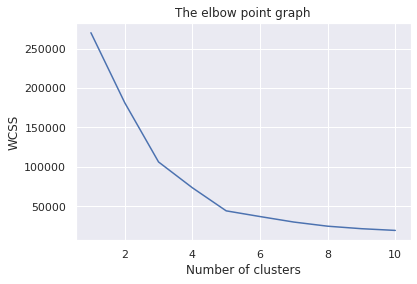

In [13]:
# plot an elbow graph to find which cluster has minimum value

sns.set() # gives basic parameters and themes required
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters = 5

Trainin the k-means clustering model

k = number of clusters i.e 5 here

In [15]:
kmeans = KMeans(n_clusters = 5, init="k-means++",random_state=0)

# reurn a label for each data point based on their cluster
# ie each cluster will be given a label
Y = kmeans.fit_predict(X)
# the value is stored in Y variable 
# fit_predict tells a cluster no. for each data point
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# **Visualising all the clusters**

**In KMEANS clustering, centeroids are plotted first. Then the points are plotted in the graph based upon their x,y axes and clustered into nearest centroid clusters**

5 clusters = 0,1,2,3,4
X[Y==0,0] -> first 0 is !st cluster, second 0 is 1st column ie annual income

X[Y==0,1] -> cluster 0, column 1 ie spending score

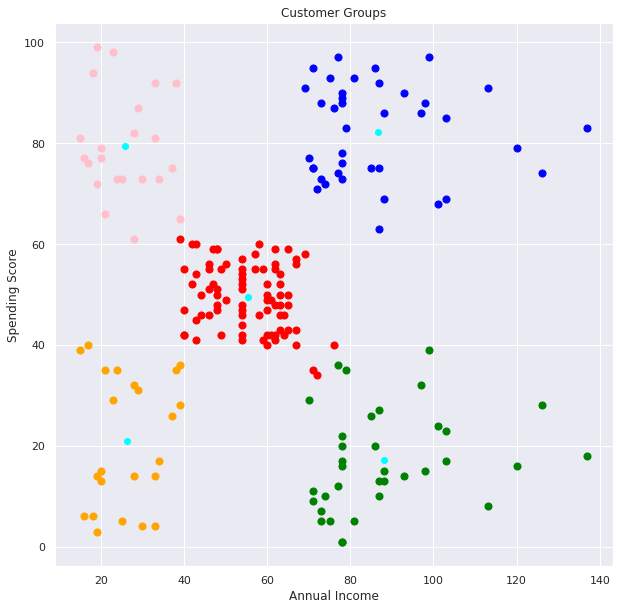

In [20]:
# plotting all the clusters and their centroids

plt.figure(figsize=(10,10))
#            x-coord    y-coord   s=size of dots    c= color of dots
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='pink', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()